website: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

Aim: classify mobile price range (find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and       its selling price)

Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.But he is not so good at Machine Learning. So he needs your help to solve this problem.In this problem you do not have to predict actual price but a price range indicating how high the price is

USE:
•	This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
•	Also it will be usefull for Consumers to verify that they are paying best price for a mobile.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

C:\Users\kittu\AppData\Roaming\Python\Python36\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df=pd.read_csv('mobile _dataset.csv')
df.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  

[3 rows x 21 columns]

In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

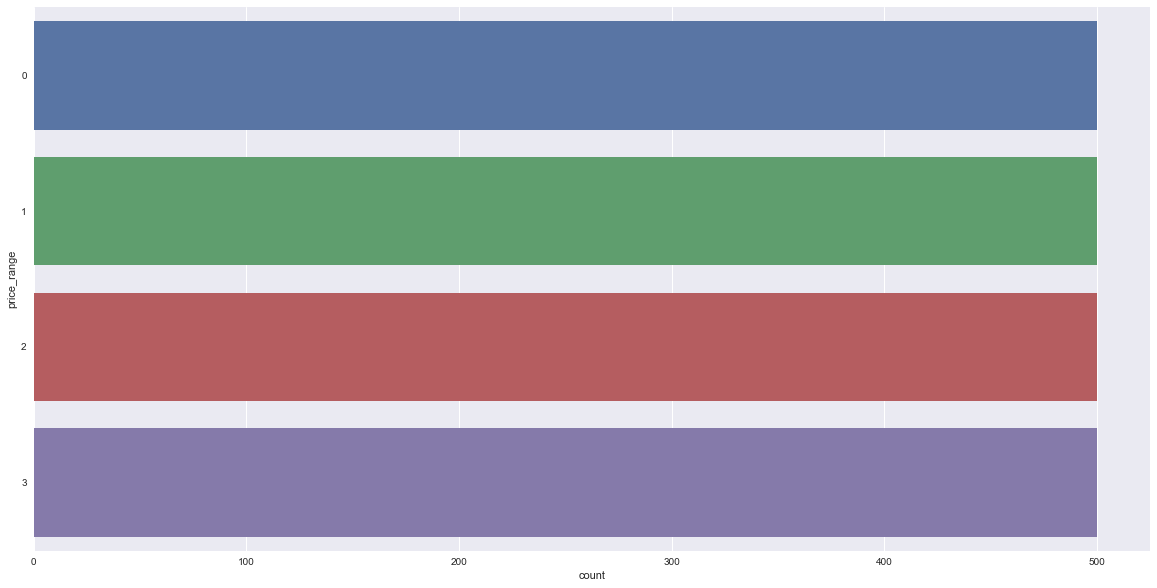

In [8]:
#given data is balanced data
plt.figure(figsize=(20,10))
sns.countplot(y='price_range',data=df)
import warnings
warnings.filterwarnings("ignore")
plt.show()

In [9]:
df1 = df[df.price_range==0]
df2 = df[df.price_range==1]
df3 = df[df.price_range==2]
df4 = df[df.price_range==3]

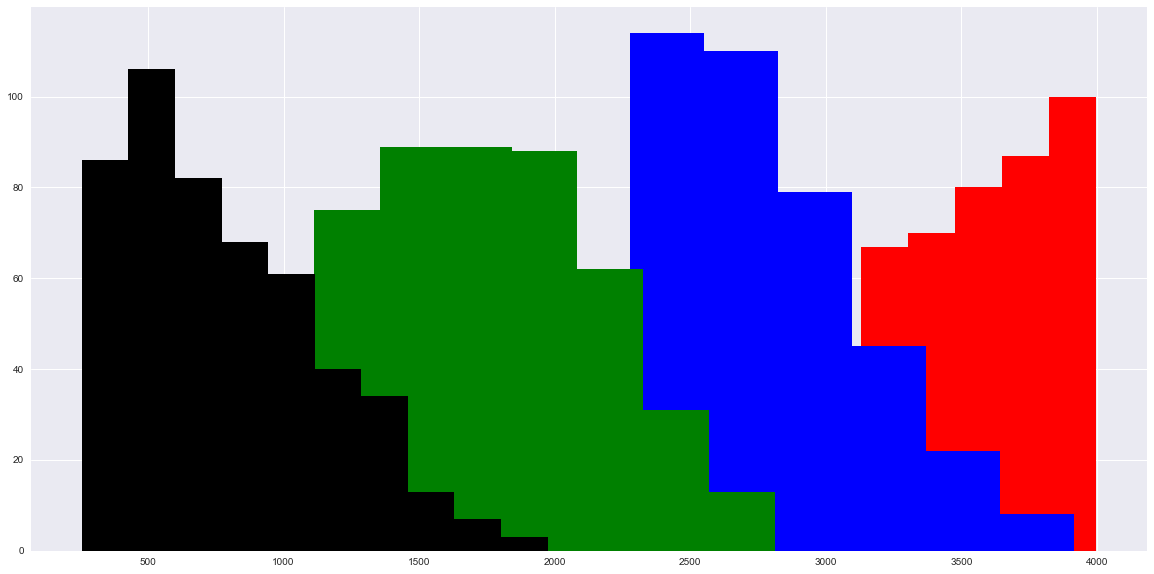

In [10]:
#2 category mobiles are having high ram
plt.figure(figsize=(20,10))
plt.hist(df4['ram'],color='red')
plt.hist(df3['ram'],color='blue')
plt.hist(df2['ram'],color='green')
plt.hist(df1['ram'],color='black')
plt.show()

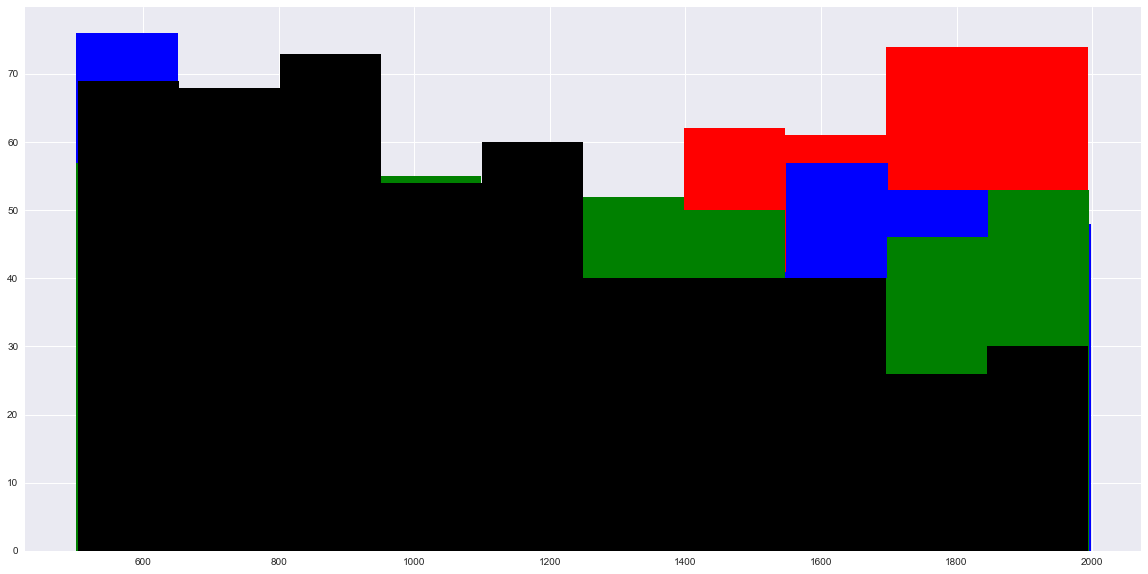

In [11]:
#2 category mobiles are having high battery power
plt.figure(figsize=(20,10))
plt.hist(df4['battery_power'],color='red')
plt.hist(df3['battery_power'],color='blue')
plt.hist(df2['battery_power'],color='green')
plt.hist(df1['battery_power'],color='black')
plt.show()

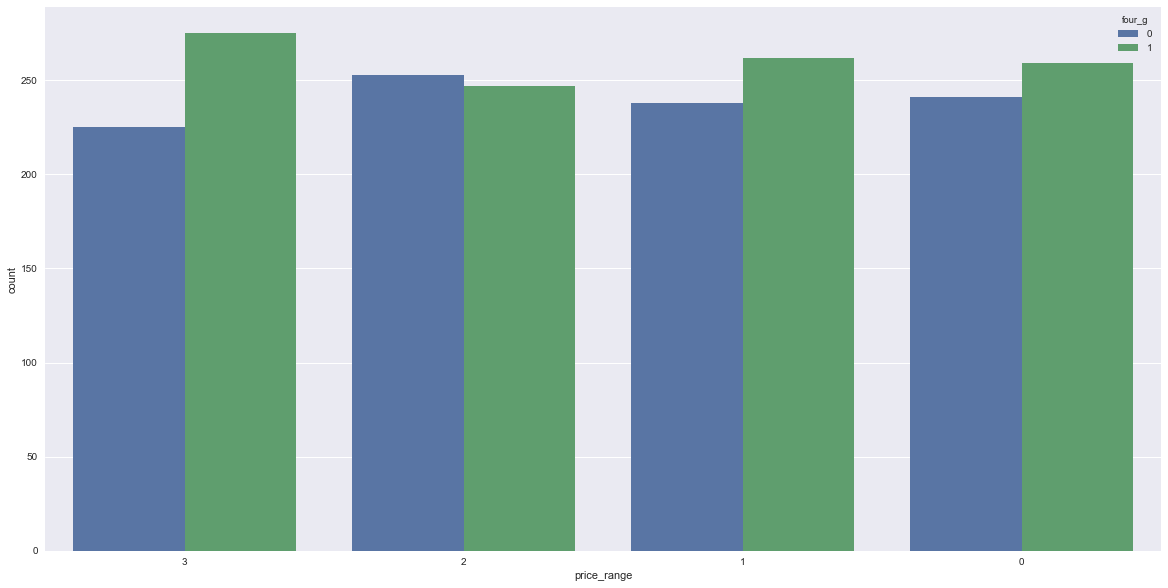

In [12]:
# four_generation 1  mobiles are higher in  3 price category
# four_generation 0  mobiles are higher in  2 price category
# we observed that four_generation 1 model cost are higher in 3 price category so we can follow this generation mobile model
plt.figure(figsize=(20,10))
sns.countplot(x='price_range',hue='four_g',data=df,order=df['price_range'].value_counts().index)
plt.show()

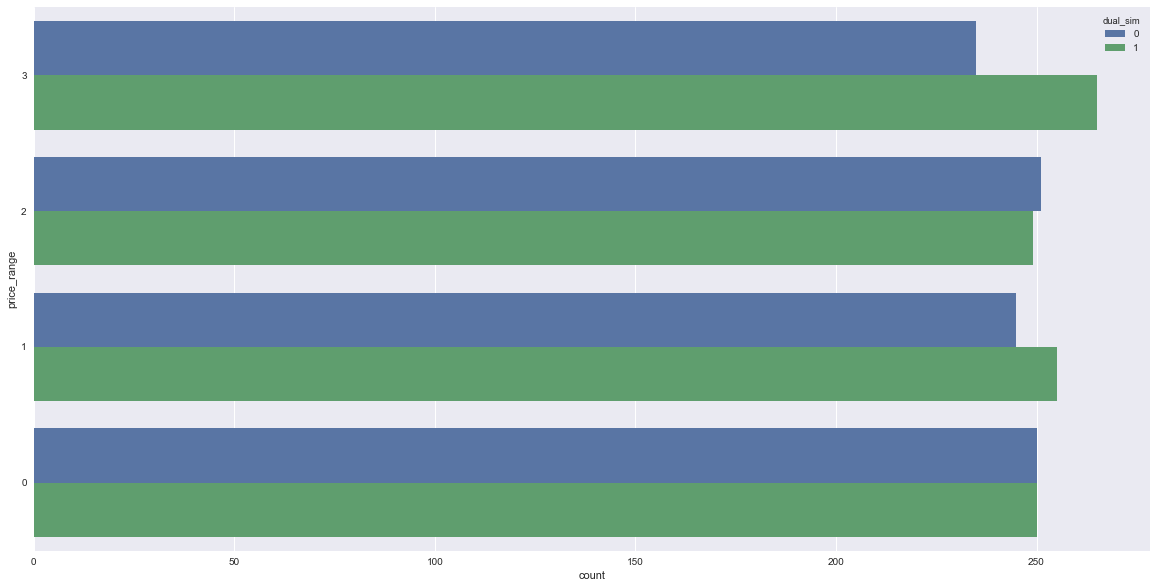

In [13]:
# dual_sim 1  mobiles are higher in  3 price category
# dual_sim 0  mobiles are higher in  2 and 0 price category
#now a days every mobile has dual sim so it is not consider as better one
plt.figure(figsize=(20,10))
sns.countplot(y='price_range',hue='dual_sim',data=df,order=df['price_range'].value_counts().index)
plt.show()


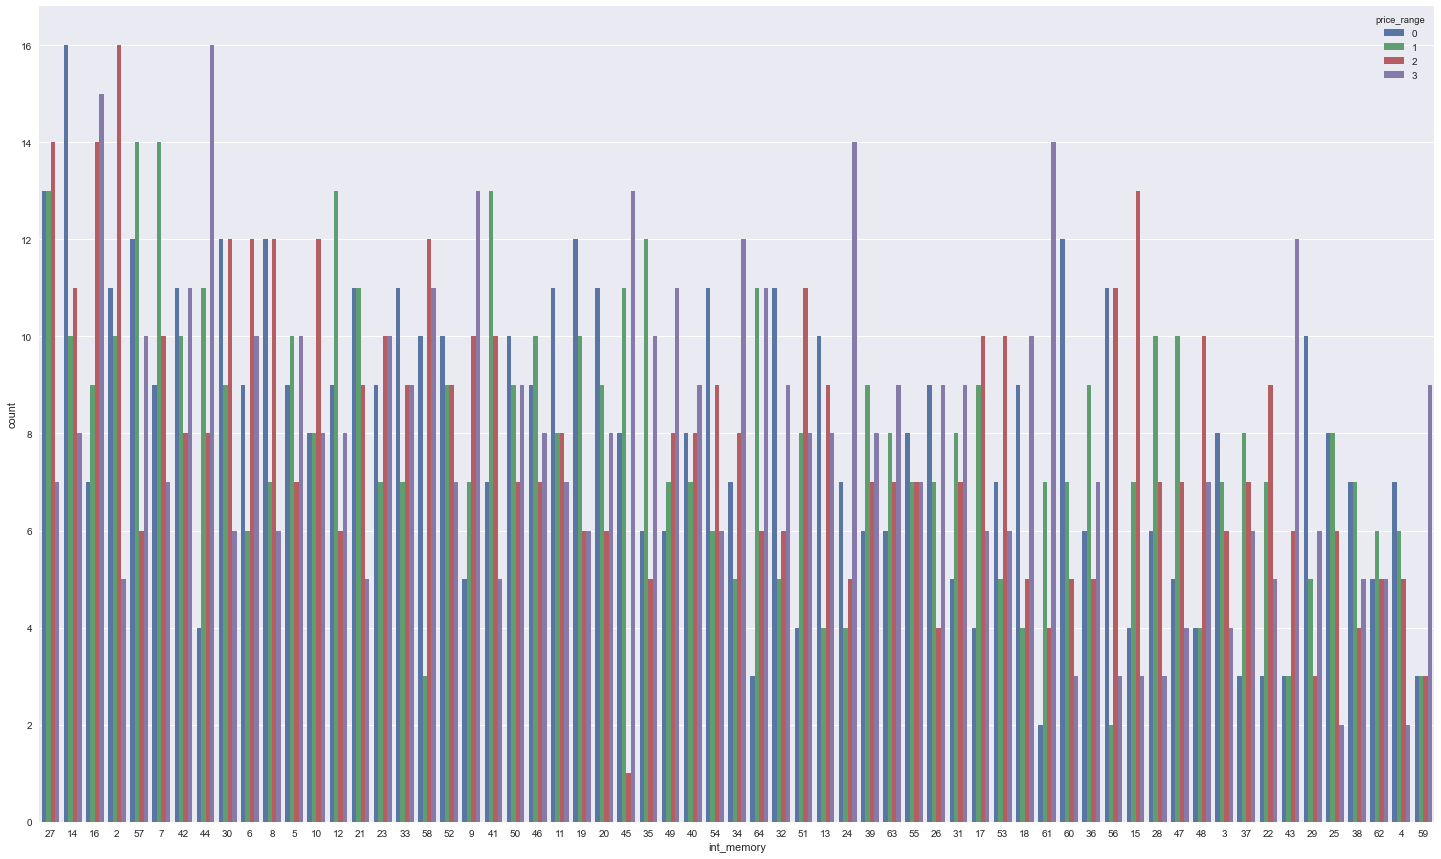

(2, 64)

In [14]:
#here we observed that internal memeory has are higher for 0,1,3 mobile price category 
plt.figure(figsize=(25,15))
sns.countplot(x='int_memory',hue='price_range',data=df,order=df['int_memory'].value_counts().index)
plt.show()
df.int_memory.min(),df.int_memory.max()

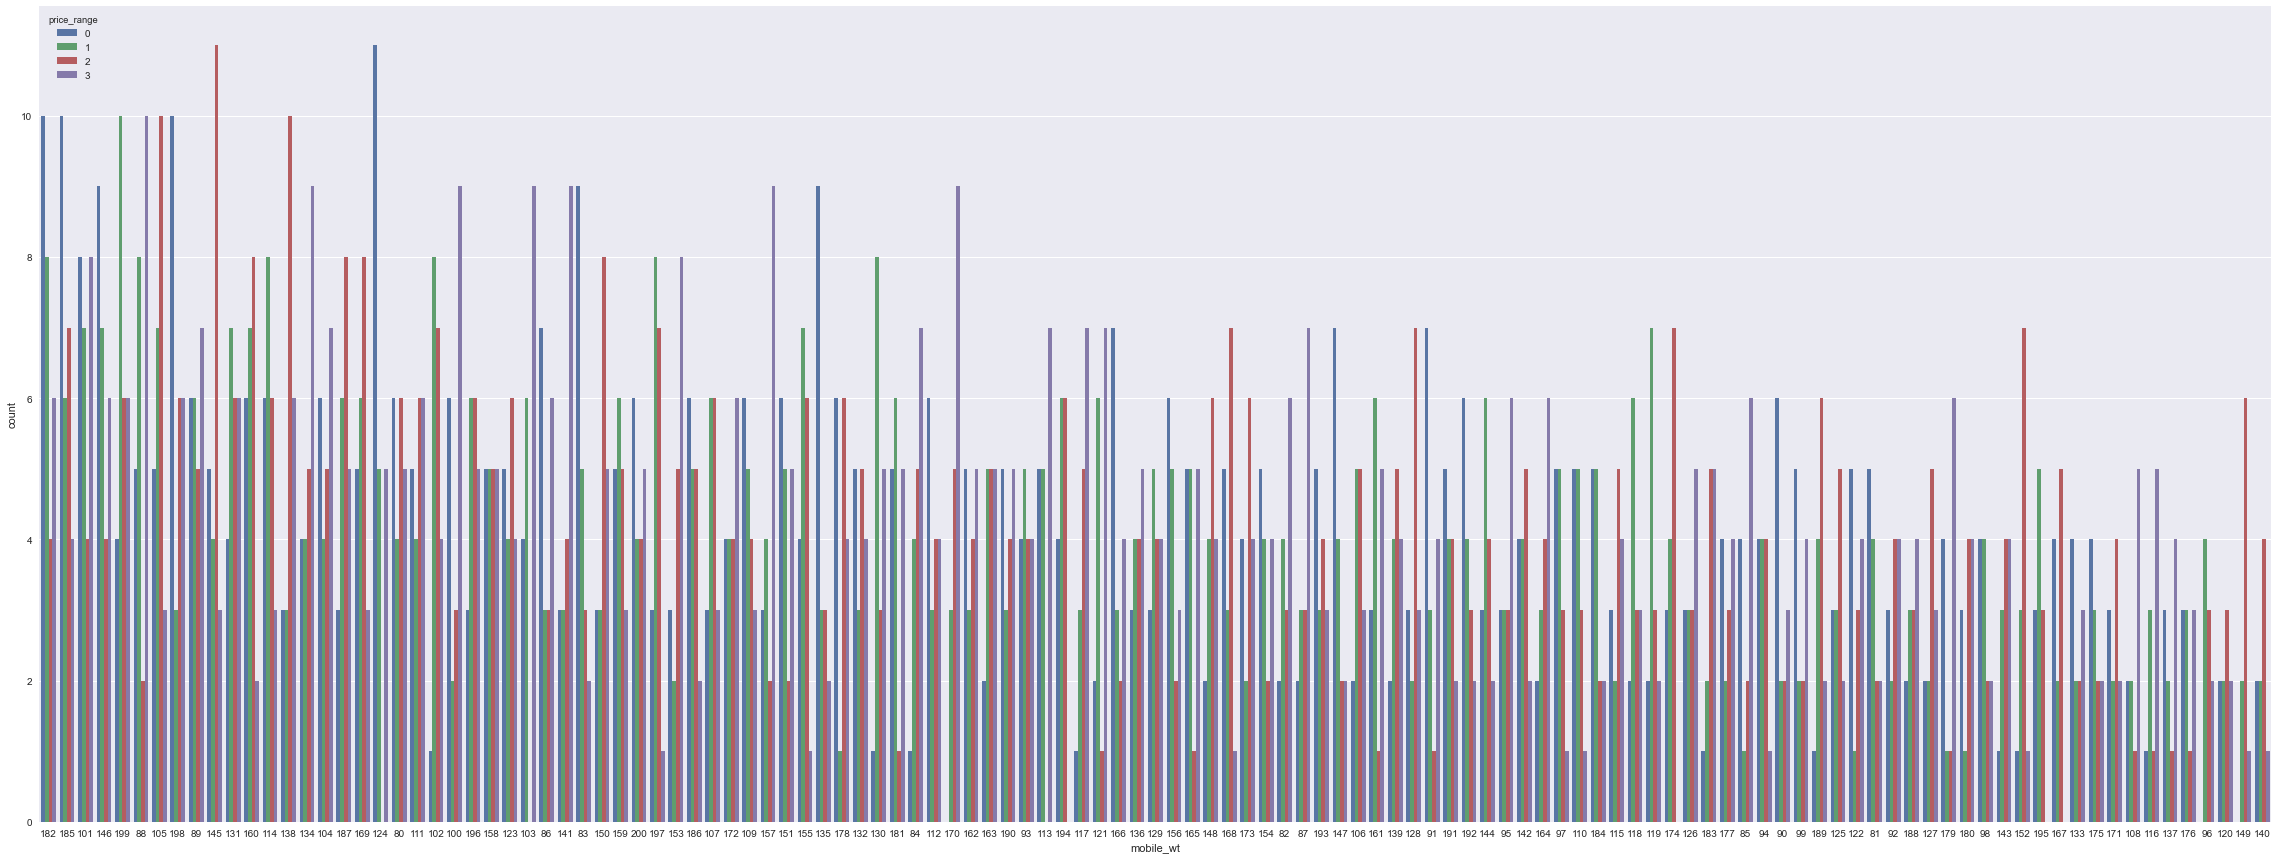

(80, 200)

In [15]:
# here we observed that high mobile weight for 2 and 3 price category mobiles
plt.figure(figsize=(40,15))
sns.countplot(x='mobile_wt',hue='price_range',data=df,order=df['mobile_wt'].value_counts().index)
plt.show()
df.mobile_wt.min(),df.mobile_wt.max()

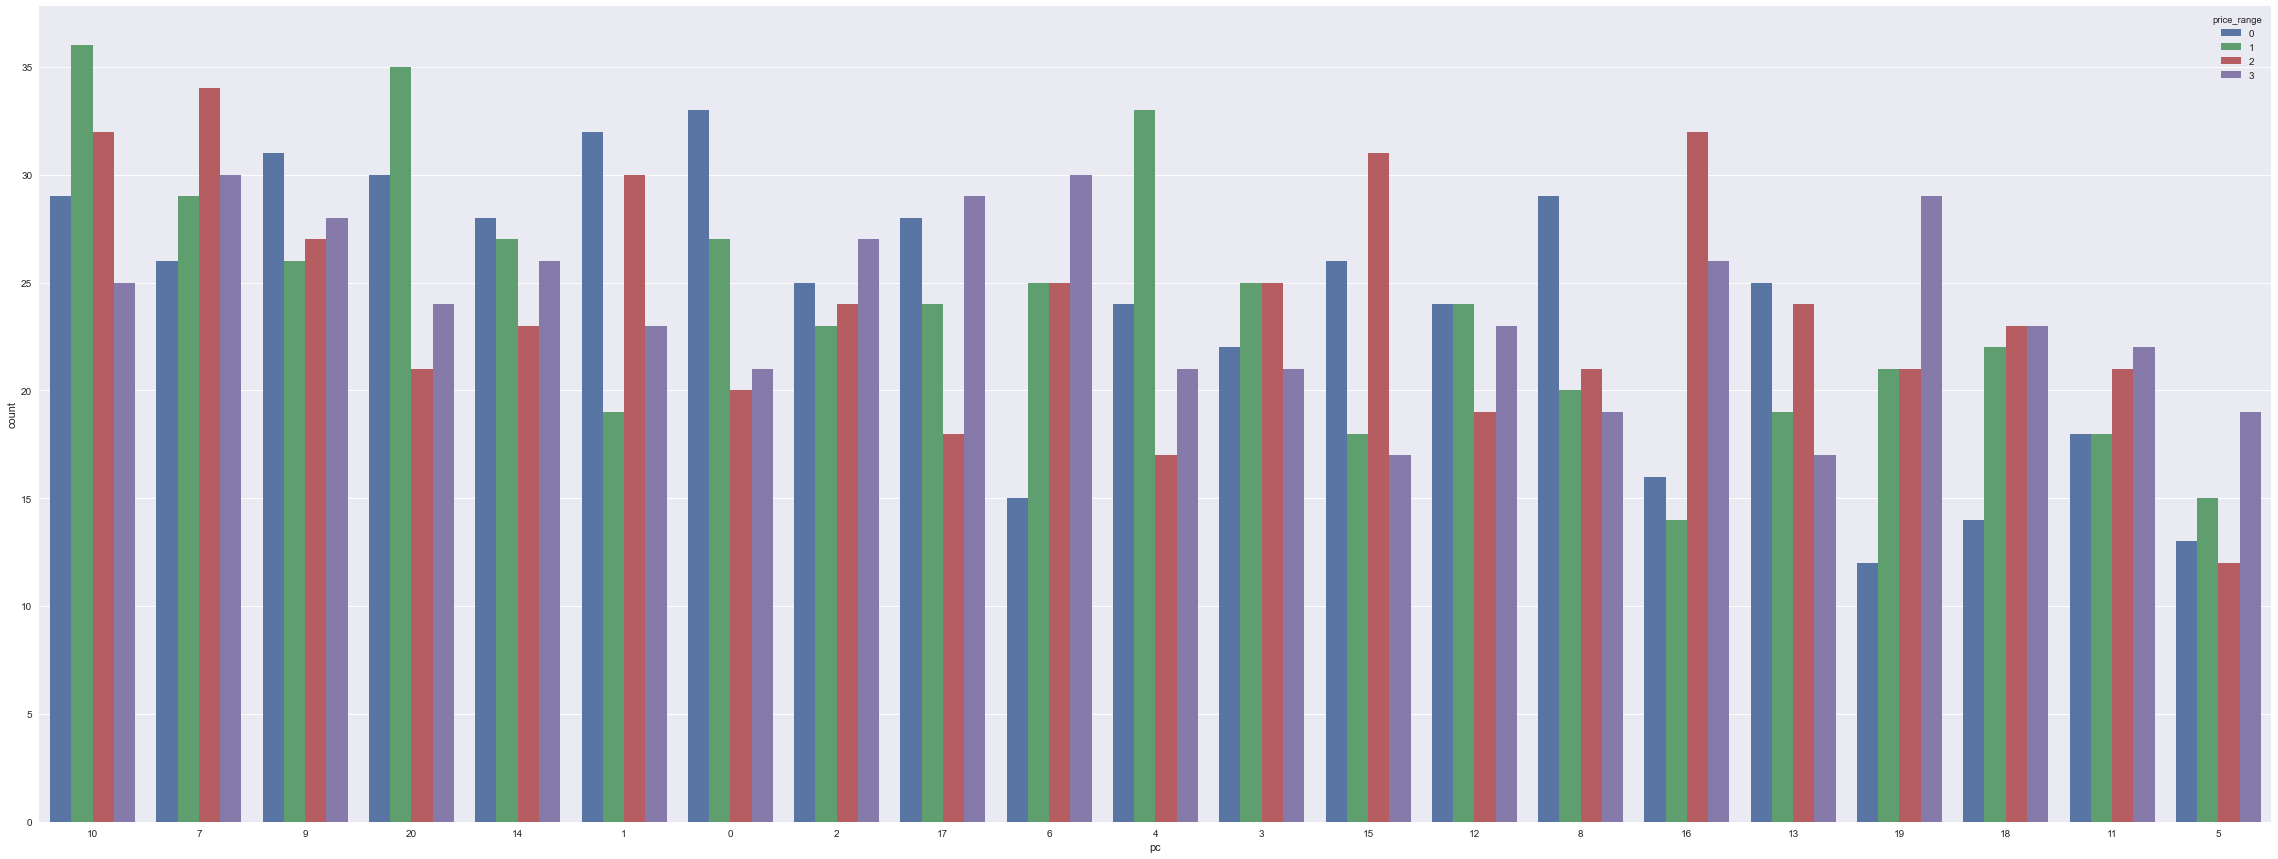

(0, 20)

In [16]:
# here we observed that high pc for 1 and 2 price category mobiles
plt.figure(figsize=(40,15))
sns.countplot(x='pc',hue='price_range',data=df,order=df['pc'].value_counts().index)
plt.show()
df.pc.min(),df.pc.max()

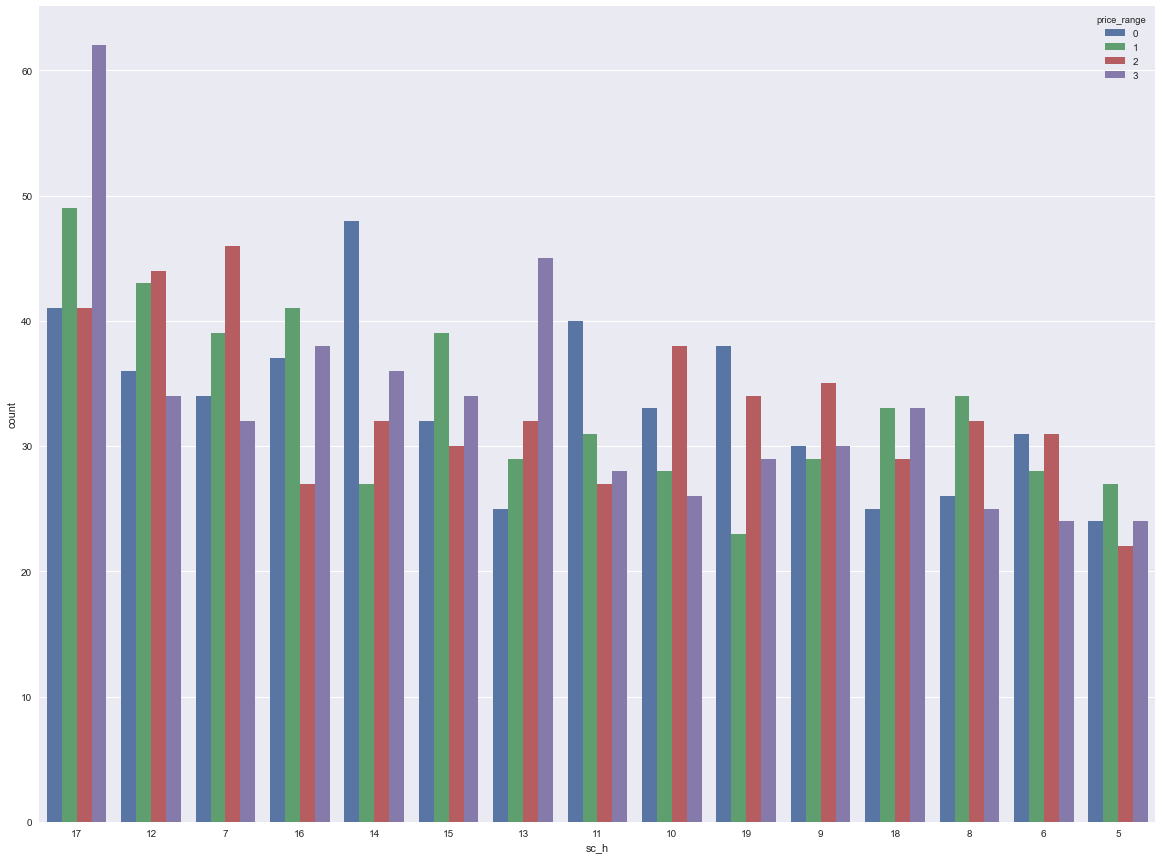

(5, 19)

In [17]:
# here we observed that high sc_h for 3 and 1 price category mobiles
plt.figure(figsize=(20,15))
sns.countplot(x='sc_h',hue='price_range',data=df,order=df['sc_h'].value_counts().index)
plt.show()
df.sc_h.min(),df.sc_h.max()

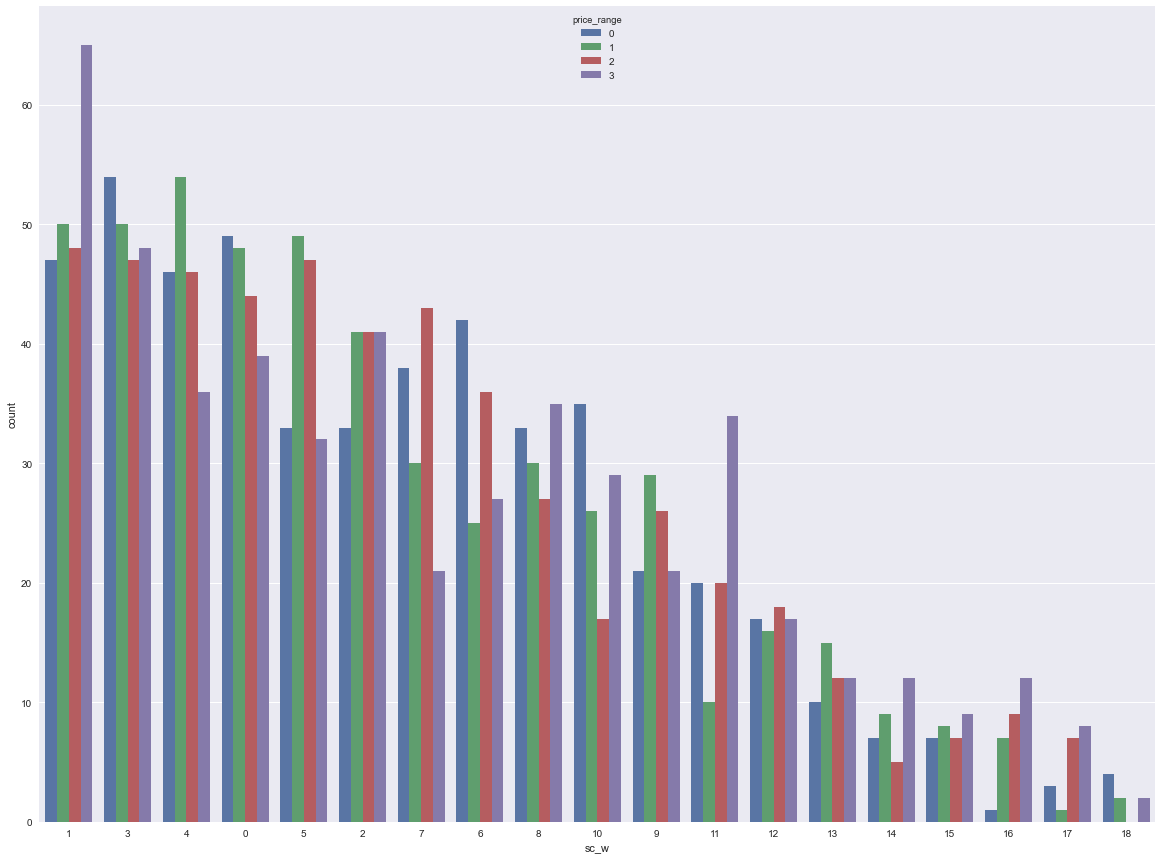

(0, 18)

In [18]:
# here we observed that high sc_w for 3, 0 and 1 price category mobiles
plt.figure(figsize=(20,15))
sns.countplot(x='sc_w',hue='price_range',data=df,order=df['sc_w'].value_counts().index)
plt.show()
df.sc_w.min(),df.sc_w.max()

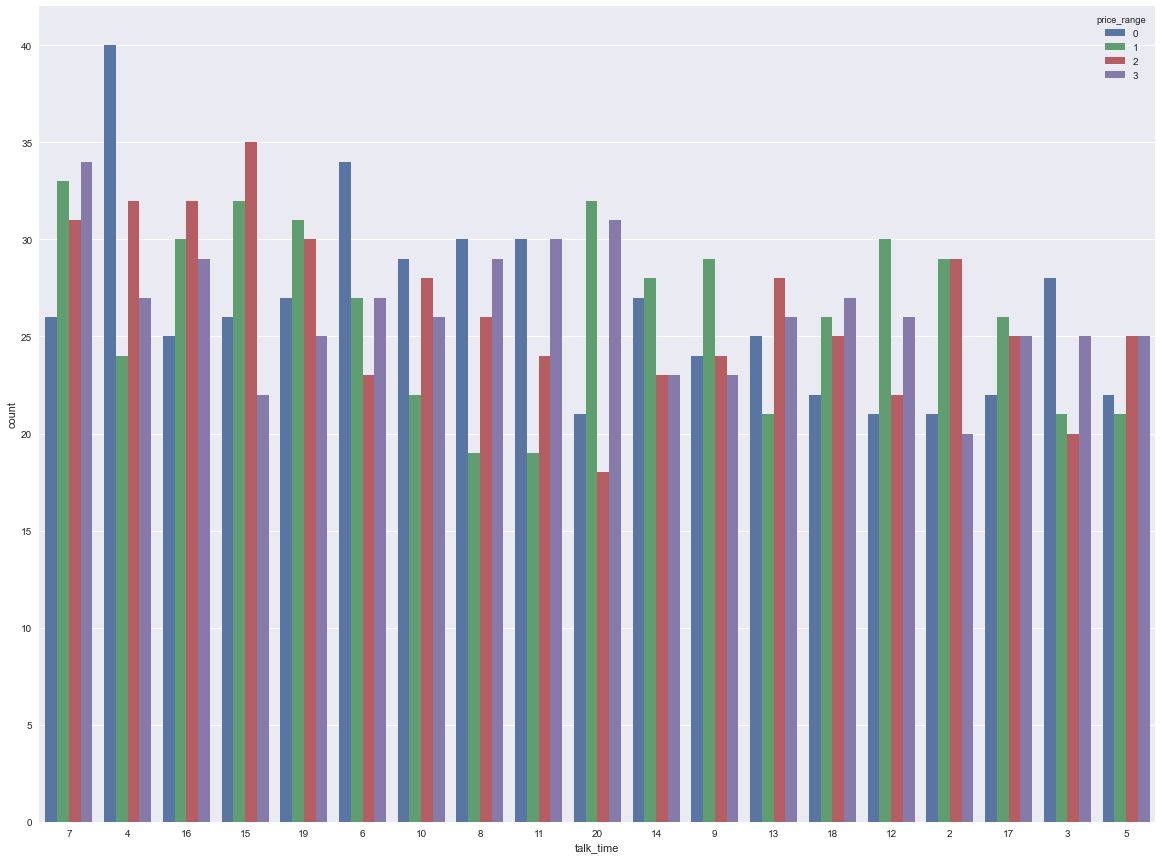

(2, 20)

In [19]:
# here we observed that high talk_time for 0 and 2 price category mobiles
plt.figure(figsize=(20,15))
sns.countplot(x='talk_time',hue='price_range',data=df,order=df['talk_time'].value_counts().index)
plt.show()
df.talk_time.min(),df.talk_time.max()


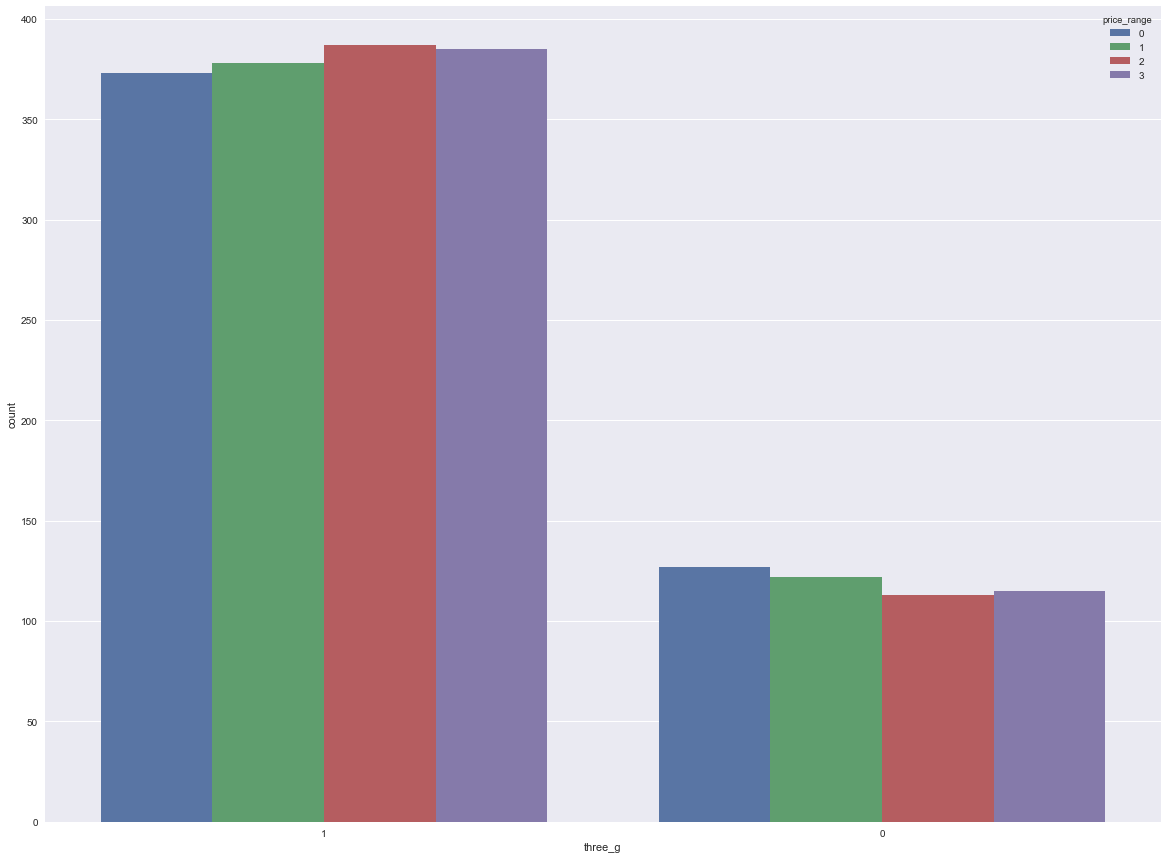

(0, 1)

In [20]:
# here we observed that high three_g for 2 and 3 price category mobiles
plt.figure(figsize=(20,15))
sns.countplot(x='three_g',hue='price_range',data=df,order=df['three_g'].value_counts().index)
plt.show()
df.three_g.min(),df.three_g.max()


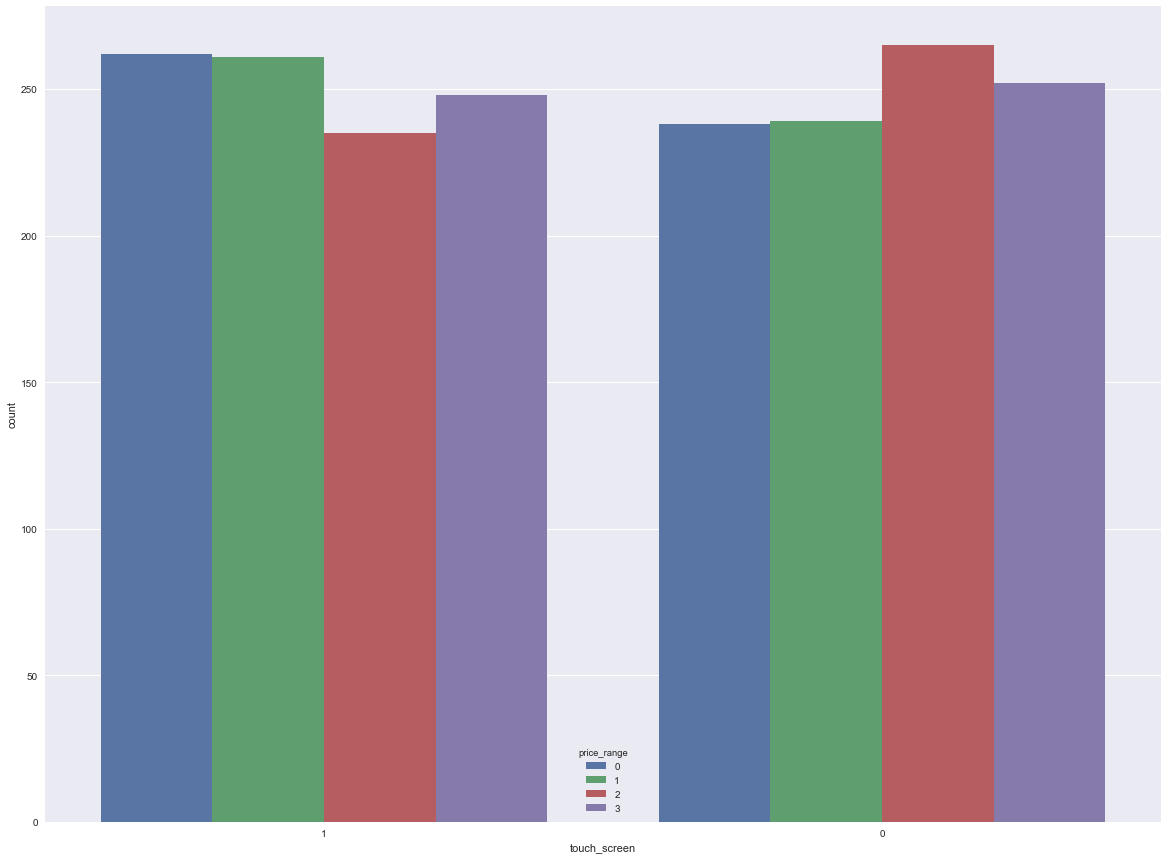

(0, 1)

In [21]:
# here we observed that high touch_screen for 0 and 2 price category mobiles
plt.figure(figsize=(20,15))
sns.countplot(x='touch_screen',hue='price_range',data=df,order=df['touch_screen'].value_counts().index)
plt.show()
df.touch_screen.min(),df.touch_screen.max()

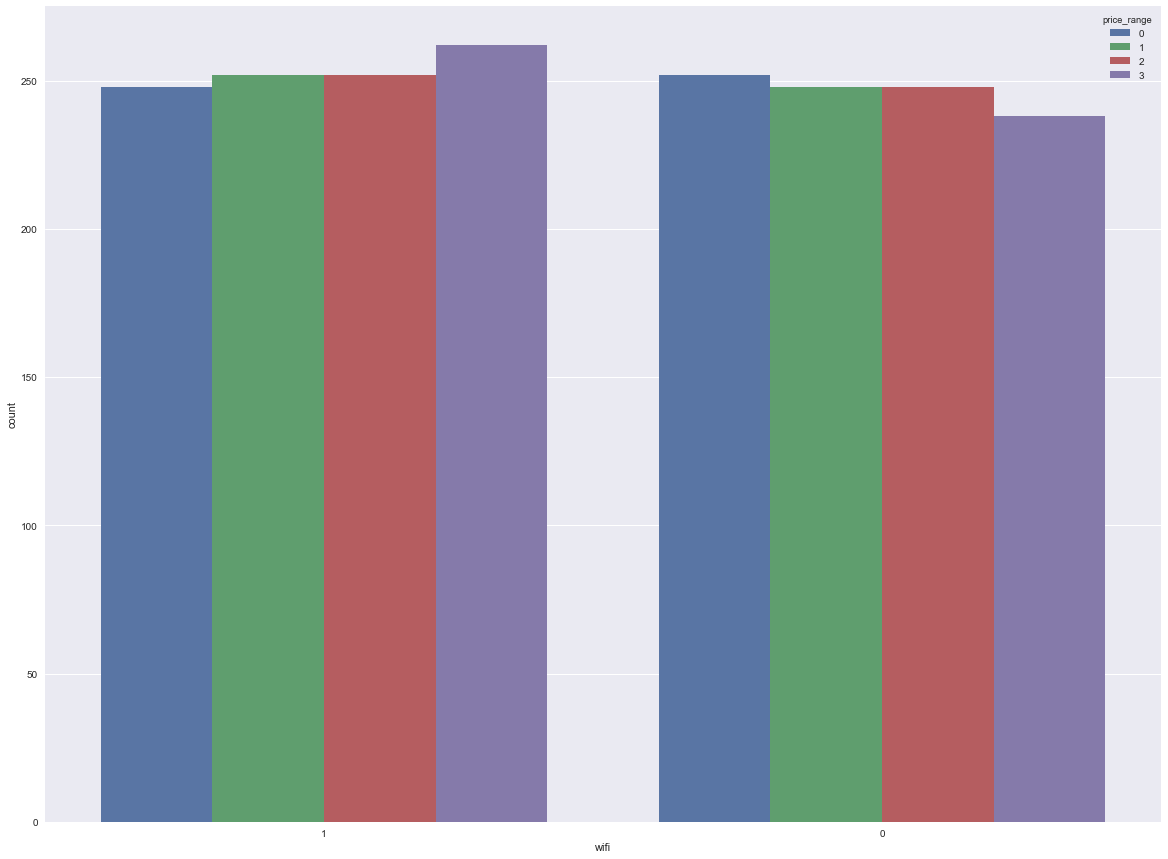

(0, 1)

In [22]:
# here we observed that high wifi 0 for 3 and high wifi 1 for 0 price category mobiles
plt.figure(figsize=(20,15))
sns.countplot(x='wifi',hue='price_range',data=df,order=df['wifi'].value_counts().index)
plt.show()
df.wifi.min(),df.wifi.max()

In [23]:
grp = df.groupby('price_range')
a = grp['ram'].agg(np.mean)
b = grp['int_memory'].agg(np.sum)
c = grp['three_g'].agg(np.mean)
d = grp['battery_power'].agg(np.mean)
#e = grp['fc'].agg(np.mean)
f = grp['four_g'].agg(np.mean)
g = grp['mobile_wt'].agg(np.mean)
#h = grp['n_cores'].agg(np.mean)
#x = grp['pc'].agg(np.mean)
j = grp['px_height'].agg(np.mean)
k = grp['px_width'].agg(np.mean)
#l = grp['sc_h'].agg(np.mean)
#m = grp['sc_w'].agg(np.mean)
#n = grp['talk_time'].agg(np.mean)
#o = grp['touch_screen'].agg(np.mean)
#p = grp['wifi'].agg(np.mean)
#print(x)
#print(y)
#print(z)

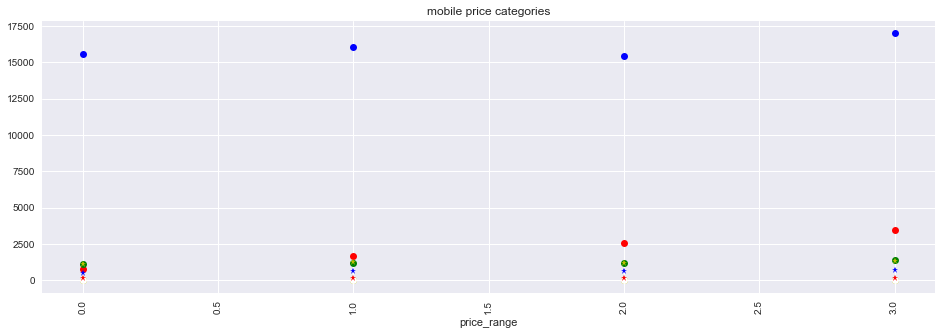

In [24]:
#from the figure we noticed that 3 price range mobile categories are prefered most of users so stake holder will follow the that category mobile features 
plt.figure(figsize=(16,5))
plt.plot(a,'ro', color='r')
plt.plot(b,'bo', color='b')
plt.plot(c,'yo', color='y')
plt.plot(d,'go', color='g')
#plt.plot(e,'bo', color='b')
plt.plot(f,'wo', color='w')
plt.plot(g,'r*', color='r')
#plt.plot(h,'r*', color='r')
#plt.plot(x,'o*', color='o')
plt.plot(j,'b*', color='b')
plt.plot(k,'y*', color='y')
#plt.plot(l,'b*', color='b')
#plt.plot(m,'i*', color='i')
#plt.plot(n,'v*', color='v')
#plt.plot(o,'r#', color='r')
#plt.plot(p,'o#', color='o')
plt.xticks(rotation=90)
plt.title('mobile price categories')
plt.xlabel('price_range')
#plt.ylabel('ram')
#plt.ylabel('int_memory')
#plt.ylabel('three_g')
plt.show()

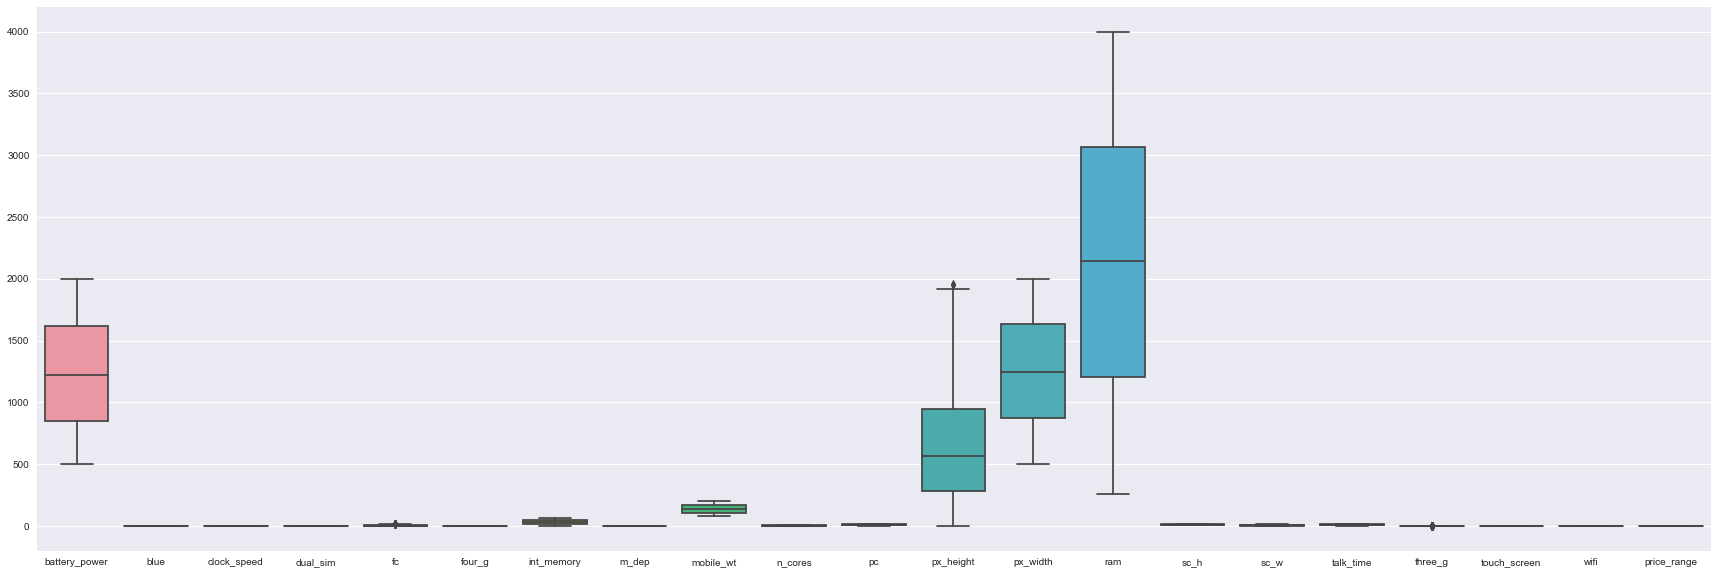

In [25]:
plt.figure(figsize=(30,10))
sns.boxplot(df)
plt.show()
import warnings
warnings.simplefilter("ignore")

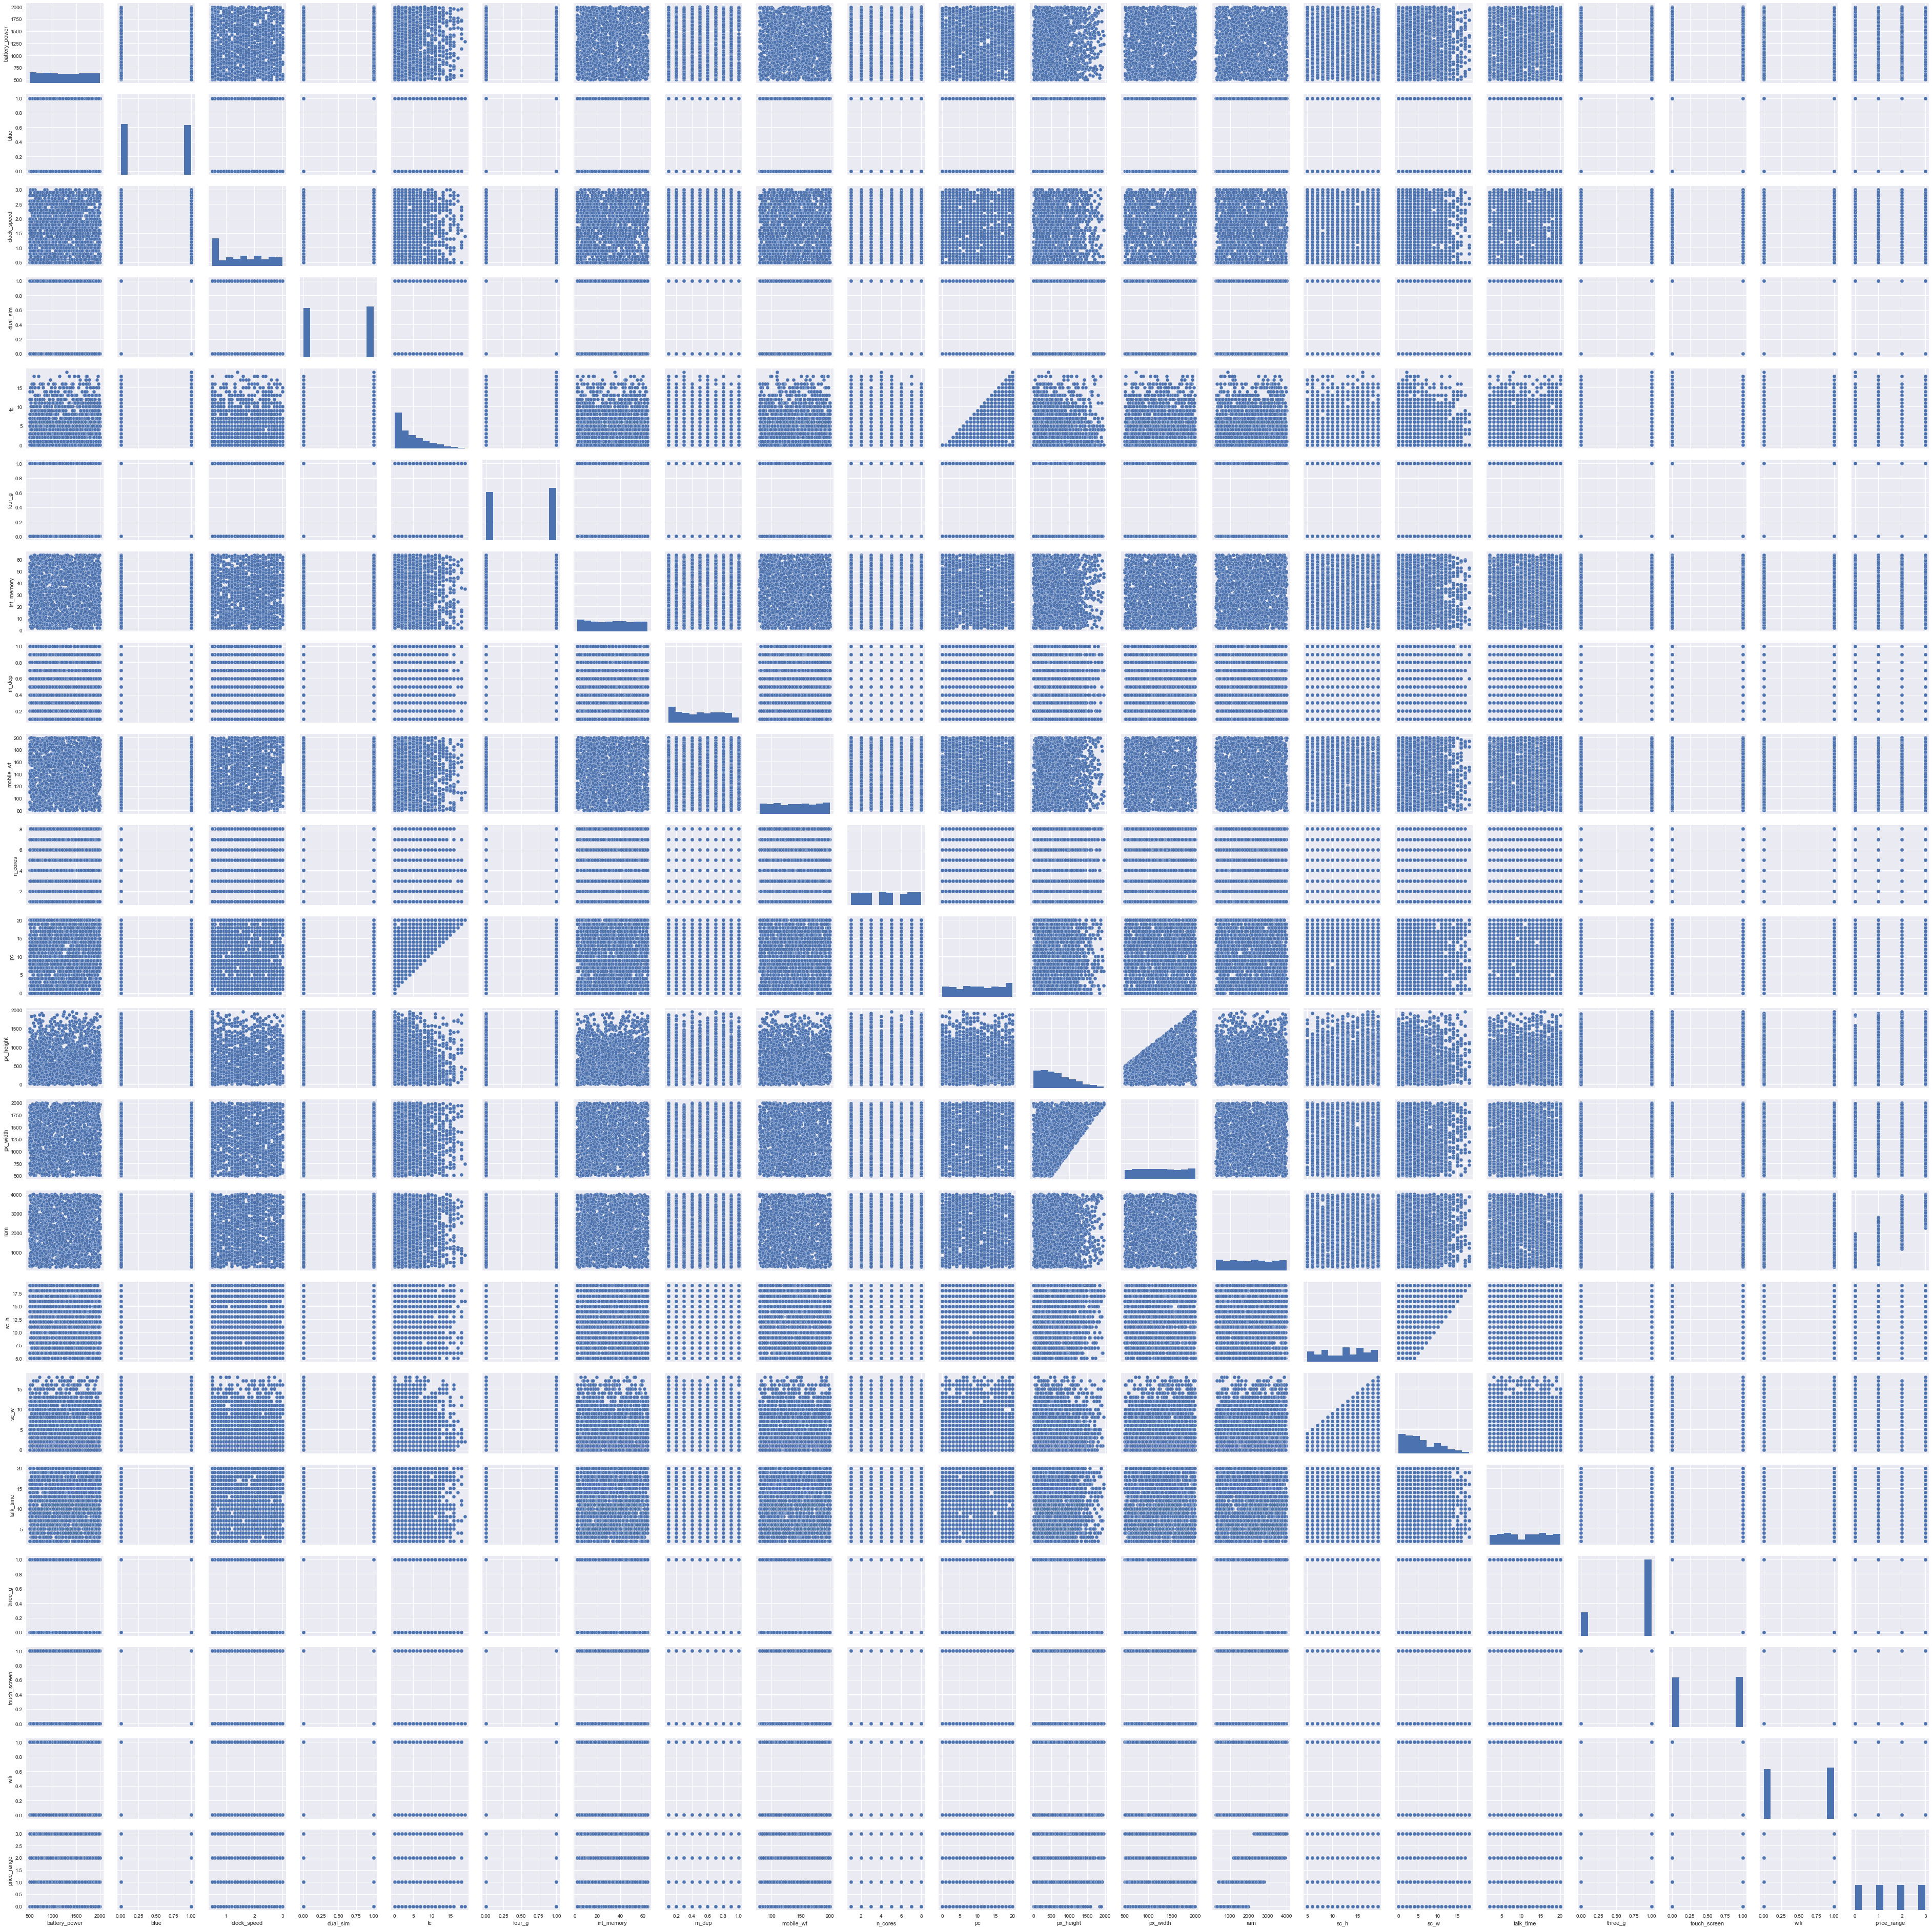

In [26]:
sns.pairplot(df)
plt.show()

# Outliers removing using IQR

In [4]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [5]:
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

battery_power   blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0             False  False        False     False  False   False       False   
1             False  False        False     False  False   False       False   
2             False  False        False     False  False   False       False   
3             False  False        False     False  False   False       False   
4             False  False        False     False  False   False       False   
...             ...    ...          ...       ...    ...     ...         ...   
1995          False  False        False     False  False   False       False   
1996          False  False        False     False  False   False       False   
1997          False  False        False     False  False   False       False   
1998          False  False        False     False  False   False       False   
1999          False  False        False     False  False   False       False   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width    ram   sc_h  \
0     False      False    False  ...      False     False  False  False   
1     False      False    False  ...      False     False  False  False   
2     False      False    False  ...      False     False  False  False   
3     False      False    False  ...      False     False  False  False   
4     False      False    False  ...      False     False  False  False   
...     ...        ...      ...  ...        ...       ...    ...    ...   
1995  False      False    False  ...      False     False  False  False   
1996  False      False    False  ...      False     False  False  False   
1997  False      False    False  ...      False     False  False  False   
1998  False      False    False  ...      False     False  False  False   
1999  False      False    False  ...      False     False  False  False   

       sc_w  talk_time  three_g  touch_screen   wifi  price_range  
0     False      False     True         False  False        False  
1     False      False    False         False  False        False  
2     False      False    False         False  False        False  
3     False      False    False         False  False        False  
4     False      False    False         False  False        False  
...     ...        ...      ...           ...    ...          ...  
1995  False      False    False         False  False        False  
1996  False      False    False         False  False        False  
1997  False      False    False         False  False        False  
1998  False      False    False         False  False        False  
1999  False      False    False         False  False        False  

[2000 rows x 21 columns]

In [29]:
df_out=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1506 rows x 21 columns]

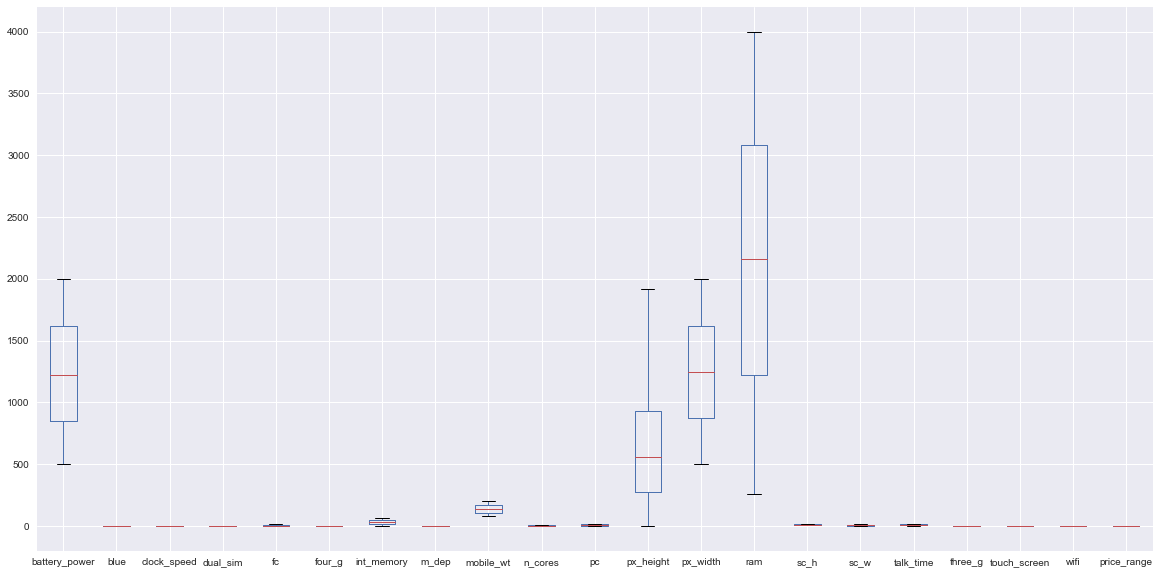

In [30]:
plt.figure(figsize=(20,10))
df_out.boxplot()
plt.show()

In [31]:
X=df_out.iloc[:,:-1]
y=df_out['price_range']
X.shape,y.shape
X.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   

   three_g  touch_screen  wifi  
1        1             1     0  
2        1             1     0  
3        1             0     0

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20) # k = 20 for total independent features 
ordered_feature=ordered_rank_features.fit(X,y)

In [34]:
df_out_scores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
df_out_columns=pd.DataFrame(X.columns)


In [35]:
df_out_features_rank=pd.concat([df_out_columns,df_out_scores],axis=1)
df_out_features_rank

0          Score
0   battery_power    9891.076896
1            blue       0.338905
2     clock_speed       2.091838
3        dual_sim       0.325111
4              fc      21.723697
5          four_g       2.052708
6      int_memory      55.731630
7           m_dep       0.706167
8       mobile_wt      57.910604
9         n_cores       4.882948
10             pc      16.153332
11      px_height   11517.808624
12       px_width    6471.969862
13            ram  698102.103984
14           sc_h       9.866500
15           sc_w      13.021491
16      talk_time      12.533488
17        three_g       0.000000
18   touch_screen       1.564222
19           wifi       0.255704

In [36]:
df_out_features_rank.columns=['Features','Score']
df_out_features_rank

Features          Score
0   battery_power    9891.076896
1            blue       0.338905
2     clock_speed       2.091838
3        dual_sim       0.325111
4              fc      21.723697
5          four_g       2.052708
6      int_memory      55.731630
7           m_dep       0.706167
8       mobile_wt      57.910604
9         n_cores       4.882948
10             pc      16.153332
11      px_height   11517.808624
12       px_width    6471.969862
13            ram  698102.103984
14           sc_h       9.866500
15           sc_w      13.021491
16      talk_time      12.533488
17        three_g       0.000000
18   touch_screen       1.564222
19           wifi       0.255704

In [37]:
df_out_features_rank.nlargest(10,'Score')

Features          Score
13            ram  698102.103984
11      px_height   11517.808624
0   battery_power    9891.076896
12       px_width    6471.969862
8       mobile_wt      57.910604
6      int_memory      55.731630
4              fc      21.723697
10             pc      16.153332
15           sc_w      13.021491
16      talk_time      12.533488

# Feature Importance

This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [39]:
print(model.feature_importances_)

[0.06248194 0.02152193 0.03499686 0.0205453  0.03406927 0.01706875
 0.03598229 0.03464257 0.03772504 0.03507375 0.03547391 0.04818555
 0.04820139 0.38861571 0.03594222 0.0344791  0.03540639 0.
 0.01950256 0.02008547]


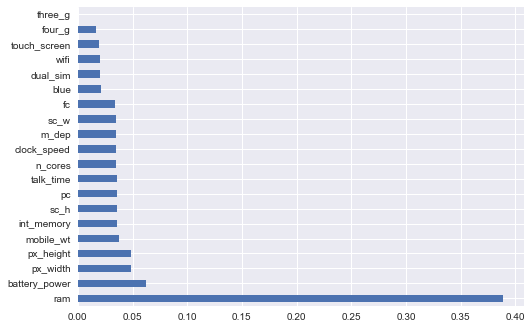

In [40]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

# Correlation

In [41]:
df_out.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000 -0.008773    -0.004233 -0.060162  0.008872   
blue               -0.008773  1.000000     0.023868  0.008268  0.007671   
clock_speed        -0.004233  0.023868     1.000000 -0.005561 -0.005252   
dual_sim           -0.060162  0.008268    -0.005561  1.000000 -0.047572   
fc                  0.008872  0.007671    -0.005252 -0.047572  1.000000   
four_g              0.013188  0.042533    -0.022168  0.014357 -0.024502   
int_memory         -0.003460  0.045125     0.006357 -0.019482 -0.041241   
m_dep               0.046109  0.010157    -0.006467 -0.031846 -0.016700   
mobile_wt          -0.003431 -0.008820     0.001881 -0.019662  0.019940   
n_cores            -0.019718  0.026366     0.008819 -0.017252 -0.012578   
pc                  0.037810 -0.003326    -0.011558 -0.014931  0.638639   
px_height           0.001999 -0.005624    -0.034380 -0.019638 -0.026090   
px_width           -0.015348 -0.031530    -0.035603  0.022427 -0.033701   
ram                -0.001201  0.022473     0.017788  0.029773  0.027878   
sc_h               -0.022289 -0.000398    -0.040479 -0.010486 -0.003695   
sc_w               -0.013836  0.012280     0.019216 -0.013168 -0.010430   
talk_time           0.050343  0.010938    -0.001268 -0.029936 -0.003210   
three_g                  NaN       NaN          NaN       NaN       NaN   
touch_screen       -0.000995  0.001662     0.008640 -0.018722 -0.014226   
wifi               -0.029398  0.005611    -0.007846  0.046373  0.021441   
price_range         0.198363  0.012853    -0.008426  0.002248  0.027070   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.013188   -0.003460  0.046109  -0.003431 -0.019718  ...   
blue           0.042533    0.045125  0.010157  -0.008820  0.026366  ...   
clock_speed   -0.022168    0.006357 -0.006467   0.001881  0.008819  ...   
dual_sim       0.014357   -0.019482 -0.031846  -0.019662 -0.017252  ...   
fc            -0.024502   -0.041241 -0.016700   0.019940 -0.012578  ...   
four_g         1.000000    0.020596  0.007449  -0.026918 -0.032471  ...   
int_memory     0.020596    1.000000  0.015116  -0.040348 -0.048364  ...   
m_dep          0.007449    0.015116  1.000000   0.015948  0.000406  ...   
mobile_wt     -0.026918   -0.040348  0.015948   1.000000 -0.029157  ...   
n_cores       -0.032471   -0.048364  0.000406  -0.029157  1.000000  ...   
pc            -0.005414   -0.035511  0.005980   0.023182 -0.014805  ...   
px_height     -0.001418    0.006903  0.033932   0.024237 -0.007378  ...   
px_width       0.012519   -0.016949  0.007167   0.011310  0.037408  ...   
ram           -0.002570    0.029208  0.008157   0.005880  0.004067  ...   
sc_h           0.027715    0.050207 -0.025091  -0.044683  0.000995  ...   
sc_w           0.026561    0.040585 -0.027170  -0.016249  0.035266  ...   
talk_time     -0.029138   -0.019374  0.011087   0.010561  0.000595  ...   
three_g             NaN         NaN       NaN        NaN       NaN  ...   
touch_screen   0.015259   -0.047263 -0.007385  -0.032637  0.039057  ...   
wifi          -0.031373    0.010927 -0.032769  -0.010552 -0.010249  ...   
price_range    0.001439    0.039853  0.017375  -0.021242  0.003618  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.001999 -0.015348 -0.001201 -0.022289 -0.013836   0.050343   
blue           -0.005624 -0.031530  0.022473 -0.000398  0.012280   0.010938   
clock_speed    -0.034380 -0.035603  0.017788 -0.040479  0.019216  -0.001268   
dual_sim       -0.019638  0.022427  0.029773 -0.010486 -0.013168  -0.029936   
fc             -0.026090 -0.033701  0.027878 -0.003695 -0.010430  -0.003210   
four_g         -0.001418  0.012519 -0.002570  0.027715  0.026561  -0.029138   
int_memory      0.006903 -0.016949  0.029208  0.050207  0.040585  -0.019374   
m_dep           0.033932  0.007167  0.008157 -0.025091 -0.027170   0.011087   
mo

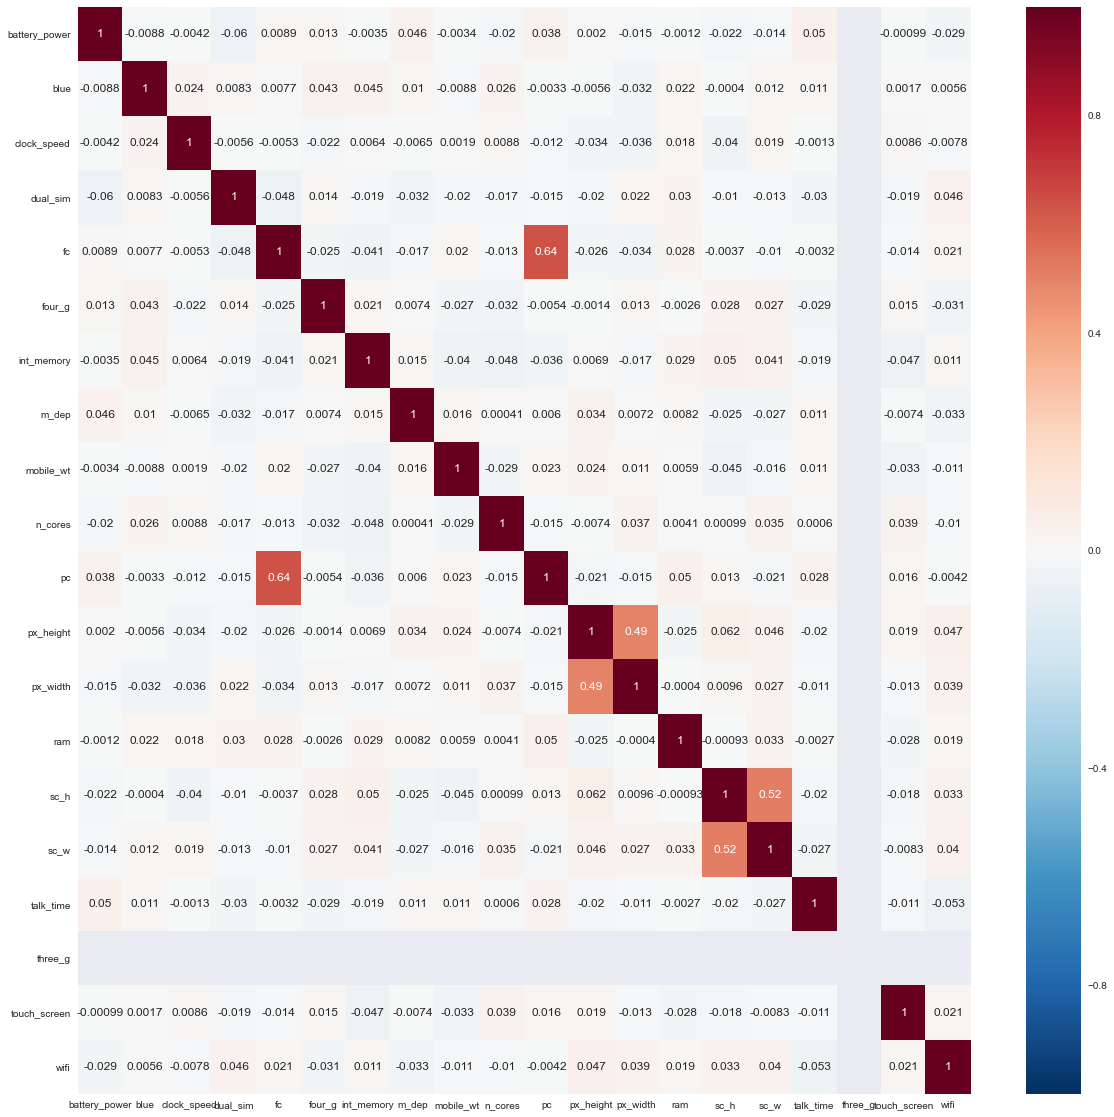

In [42]:
import seaborn as sns
corr=df_out.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df_out[top_features].corr(),annot=True)
plt.show()

#### Remove The correlated

In [43]:
threshold=0.8

In [44]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [45]:
correlation(df_out.iloc[:,:-1],threshold)

set()

# Information Gain

In [46]:
from sklearn.feature_selection import mutual_info_classif

In [47]:
mutual_info=mutual_info_classif(X,y)

In [48]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.853520
px_width         0.025799
battery_power    0.023726
sc_h             0.017859
fc               0.017134
mobile_wt        0.014815
int_memory       0.013012
n_cores          0.001690
px_height        0.000000
pc               0.000000
touch_screen     0.000000
sc_w             0.000000
m_dep            0.000000
talk_time        0.000000
four_g           0.000000
three_g          0.000000
dual_sim         0.000000
clock_speed      0.000000
blue             0.000000
wifi             0.000000
dtype: float64

In [49]:
df_final=df_out.drop(['sc_w','touch_screen','talk_time','m_dep','sc_h','px_height','dual_sim','blue','clock_speed','wifi'],axis=1)


In [50]:
X=df_final.iloc[:,:-1]
X.head(3)

battery_power  fc  four_g  int_memory  mobile_wt  n_cores  pc  px_width  \
1           1021   0       1          53        136        3   6      1988   
2            563   2       1          41        145        5   6      1716   
3            615   0       0          10        131        6   9      1786   

    ram  three_g  
1  2631        1  
2  2603        1  
3  2769        1

In [51]:
y=df_final['price_range']
y.head(3)

1    2
2    2
3    2
Name: price_range, dtype: int64

# Feature scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(X)
D=pd.DataFrame(scaled_features,columns=df_final.columns[:-1])
D.shape

(1506, 10)

# Model 1: LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df_final['price_range'],test_size=0.2,random_state=0)
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_train.shape,y_predict.shape

((1204,), (302,))

In [54]:
accuracy_score(y_test,y_predict)

0.9205298013245033

In [55]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 83, 1: 81, 0: 75, 2: 63})


col_0         0   1   2   3
price_range                
0            71   4   0   0
1             2  75   4   0
2             0   2  54   7
3             0   0   5  78

In [56]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,verbose=2)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   15.5s


Best: 0.900363 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   16.0s finished


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df_final['price_range'],test_size=0.2,random_state=0)
model=LogisticRegression(C=100,penalty='l2',solver ='newton-cg')
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [58]:
accuracy_score(y_test,y_predict)

0.9205298013245033

In [59]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 83, 1: 81, 0: 75, 2: 63})


col_0         0   1   2   3
price_range                
0            70   5   0   0
1             2  75   4   0
2             0   2  55   6
3             0   0   5  78

# ROC (Receiver operating Characteristc) CURVE, AUC (Auto Regressive Curve) SCORE

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [61]:
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2,3])
n_classes = y_bin.shape[1]

In [62]:
# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size= 0.5, random_state=0)

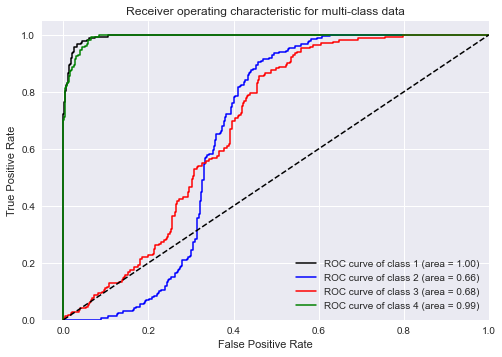

In [63]:
#We define the model as an LogisticRegression in OneVsRestClassifier setting.
#this means that the model will be used for class 1 vs class 2, #class 2vs class 3 and class 1 vs class 3. So, we have 3 cases at #the end and within each case, the bias will be varied in order to #get the ROC curve of the given case - 3 ROC curves as output.
classifier = OneVsRestClassifier(LogisticRegression(C=100,penalty='l2',solver ='newton-cg'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['black','blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Model 2: SVC

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df_final['price_range'],test_size=0.2,random_state=0)
model=SVC()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [65]:
accuracy_score(y_test,y_predict)

0.8741721854304636

In [66]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 83, 1: 81, 0: 75, 2: 63})


col_0         0   1   2   3
price_range                
0            67   8   0   0
1             7  67   7   0
2             0   2  59   2
3             0   0  12  71

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['rbf','linear','poly','sigmoid'],'C': [1,10,100,500],'gamma': [0.01,0.1,0.5,1.2]}
grid_model = GridSearchCV(SVC(random_state=10),parameters,verbose=2)
grid_model.fit(X_train,y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   58.3s finished


GridSearchCV(estimator=SVC(random_state=10),
             param_grid={'C': [1, 10, 100, 500], 'gamma': [0.01, 0.1, 0.5, 1.2],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=2)

In [68]:
grid_model.best_score_

0.887040110650069

In [69]:
grid_model.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df_final['price_range'],test_size=0.2,random_state=0)
model=SVC(C=100, gamma= 0.01, kernel= 'linear')
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9139072847682119

In [71]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 83, 1: 81, 0: 75, 2: 63})


col_0         0   1   2   3
price_range                
0            69   6   0   0
1             2  74   5   0
2             0   2  55   6
3             0   0   5  78

# SVM ROC (Receiver operating Characteristc) CURVE, AUC (Auto Regressive Curve) SCORE

In [72]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


In [73]:
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2,3])
n_classes = y_bin.shape[1]

In [74]:
# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size= 0.3, random_state=0)

In [ ]:
#We define the model as an LogisticRegression in OneVsRestClassifier setting.
#this means that the model will be used for class 1 vs class 2, #class 2vs class 3 and class 1 vs class 3. So, we have 3 cases at #the end and within each case, the bias will be varied in order to #get the ROC curve of the given case - 3 ROC curves as output.
classifier = OneVsRestClassifier(SVC(C=1, gamma= 0.01, kernel= 'linear',probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['black','blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Model 3: Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_final['price_range'],test_size=0.3,random_state=0)

In [76]:
model=RandomForestClassifier(n_estimators=10,criterion='gini')
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [77]:
y_pred=model.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred.head(3) 

0
0  3
1  1
2  2

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter
print(Counter(y_test))
accuracy_score(y_test,y_pred)

Counter({0: 119, 1: 118, 3: 117, 2: 98})


0.8362831858407079

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
# define grid search
grid = dict(n_estimators=[10, 100, 1000],max_features=['auto','sqrt', 'log2'],bootstrap= [True],max_depth= [49,50,51],min_samples_leaf=[1, 2, 4,6,8],min_samples_split=[2,5,10,14])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df_final['price_range'],test_size=0.2,random_state=0)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict)

In [ ]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

# Model 4: KNeighborsClassifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_final['price_range'],test_size=0.3,random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
print(Counter(df_final['price_range']))
#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
pd.crosstab(y_test,y_pred)
accuracy_score(y_test,y_pred)


Counter({2: 383, 3: 380, 1: 374, 0: 369})
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       119
           1       0.50      0.54      0.52       118
           2       0.50      0.55      0.52        98
           3       0.85      0.68      0.75       117

    accuracy                           0.62       452
   macro avg       0.63      0.62      0.62       452
weighted avg       0.64      0.62      0.63       452



0.6194690265486725

In [85]:
#KNN hyper parameters tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 40, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.764118 using {'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}


In [86]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df_final['price_range'],test_size=0.2,random_state=10)
model=KNeighborsClassifier(n_neighbors=39,metric='manhattan',weights='distance' )
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8013245033112583

In [88]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 80, 2: 77, 1: 75, 0: 70})


col_0         0   1   2   3
price_range                
0            62   8   0   0
1             7  52  16   0
2             0  10  57  10
3             0   0   9  71

# Model 5: Decision Tree

In [92]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_final['price_range'],test_size=0.3,random_state=0)
#model=tree.DecisionTreeClassifier()
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter
print(accuracy_score(y_test,y_predict))
print(Counter(df_final['price_range']))
pd.crosstab(y_test,y_predict)



0.8030973451327433
Counter({2: 383, 3: 380, 1: 374, 0: 369})


col_0          0   1   2    3
price_range                  
0            107  12   0    0
1             25  79  14    0
2              0  11  77   10
3              0   0  17  100

<Figure size 1080x720 with 0 Axes>

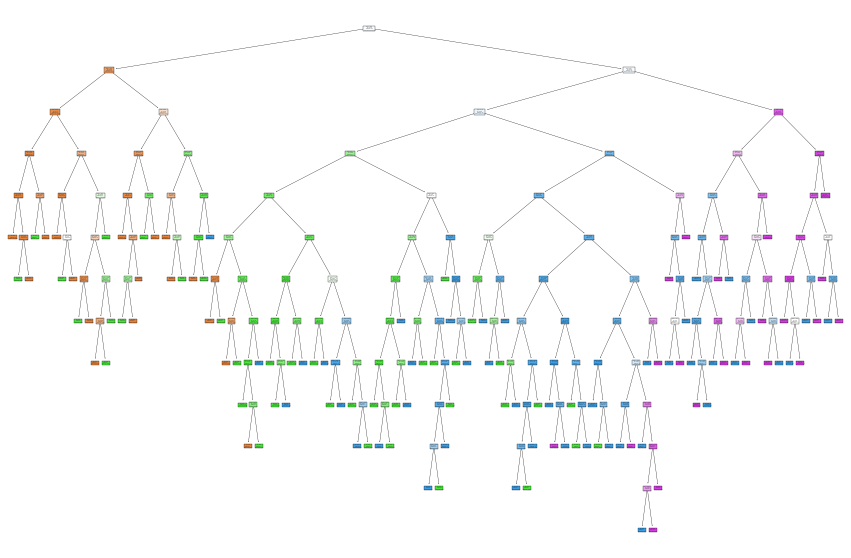

In [94]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

# Grid Search

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
#Decision Tree classifier hyper parameters tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# define models and parameters
model = DecisionTreeClassifier()
# define grid search
parameters={'criterion':('gini','entropy'),'max_depth':(3,4,5,6,7,8,9,10),'min_samples_leaf':(1,2,3,4,5)}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.840629 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4}


In [97]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df_final['price_range'],test_size=0.2,random_state=10)
model=DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=4)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8211920529801324

In [99]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 80, 2: 77, 1: 75, 0: 70})


col_0         0   1   2   3
price_range                
0            54  16   0   0
1             5  60  10   0
2             0   6  60  11
3             0   0   6  74

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        70
           1       0.73      0.80      0.76        75
           2       0.79      0.78      0.78        77
           3       0.87      0.93      0.90        80

    accuracy                           0.82       302
   macro avg       0.83      0.82      0.82       302
weighted avg       0.83      0.82      0.82       302

